In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('../ExerciseWeek3/archive/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### Defining imbalanced data in credit card fraud detection:
#### No Fraud transactions are way more predominant than Fraud transactions
#### In case of a binary label, Fraud Case will be 1, No Fraud will be 0
#### How do we solve this imbalanced data?
#### 1. Lowering the large one = Undersampling
#### OR
#### 2. Increase the smaller one = Oversampling
#### Normally oversampling is preferred due to
#### reducing sampling = downsizing number, eg:
#### Having 1000 labels but then you downsize to 100, means getting rid of 90% of data

### SMOTE  (Synthetic Minority Over-Sampling Technique)
### For Oversampling

## Creating a ML Model for Credit Card Fraud detection

In [5]:
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### We don't need time feature so let's delete it

In [9]:
from sklearn.model_selection import train_test_split

# Making a copy of the dataframe 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

#### Using get_train_test_dataset() to minimize Label Variance

In [11]:
# Function: Train & splits data after data curation process
def get_train_test_dataset(df=None):
    #Copy of original and curated dataframe
    df_copy = get_preprocessed_df(df)
    # Last column will be the label(y), rest will be features
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split(), using stratify split
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, \
    stratify=y_target)
    #return
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [12]:
print('Training Data Label Value Ratio')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('Testin Data Label Value Ratio')
print(y_test.value_counts()/y_test.shape[0] * 100)

Training Data Label Value Ratio
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
Testin Data Label Value Ratio
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


#### As we can see, the distribution of labels in both testing & training sets
#### is around the same, the stratified splitting was successful in mantaining
#### the original label distribution

#### The data is still IMBALANCED, Non Fraud (Label 0) is at average 99%
#### The Fraud Case is at average 0.1% This will be fixed with SMOTHE

In [15]:
# Evaluation function
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('Covariance Matrix')
    print(confusion)

    print(' Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f},\
    F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


### Using LogisticRegression & LightGBM models for training

In [17]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

Covariance Matrix
[[85281    14]
 [   56    92]]
 Accuracy: 0.9992, Precision: 0.8679, Recall: 0.6216,    F1: 0.7244, AUC: 0.9590


#### Covariance matrix results along with indicators
#### Creating get_model_train_eval()

In [19]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [20]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train= y_train,tgt_test=y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

### Comparing LogisticRegression results:
##### Covariance Matrix
##### [[85281    14]
##### [   56    92]]
##### Accuracy: 0.9992, Precision: 0.8679, Recall: 0.6216,    F1: 0.7244, AUC: 0.9590

### Comparing LGBM results:
##### Covariance Matrix
##### [[85290     5]
##### [   36   112]]
##### Accuracy: 0.9995, Precision: 0.9573, Recall: 0.7568,    F1: 0.8453, AUC: 0.9790

#### Explaining the numbers above:
##### Begining with the confusion matrices: LogReg shows 14 false positives, 56 false negatives
##### LGBM has 5 FP and 36 FN
##### Accuracy, Precision, Recall, F1 Score & AUC is higher in LGBM = BETTER

### Distriburion Plot of "Amount" Feature
#### Analysis of variance of Feature

<Axes: xlabel='Amount', ylabel='Density'>

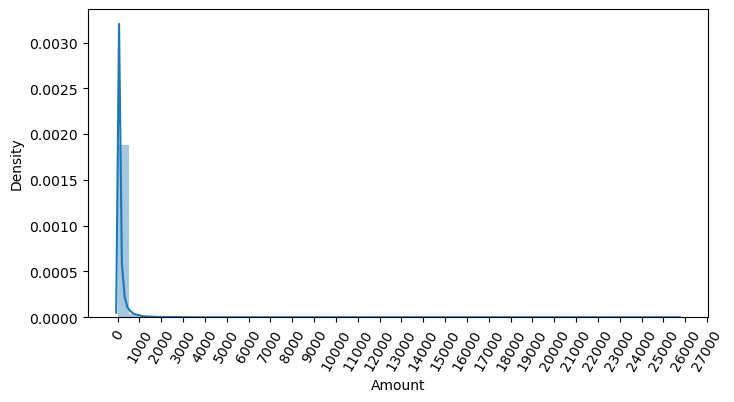

In [25]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

#### A card transaction less than $1,000 is common, and the variance is left based, highly skewed
#### If we use linear models like LogRegression, its better to normalize features

In [27]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    # Placing the scaled amount at the front
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

#### Using the scaled amount feature & retraining models

In [29]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### Logistic Regression Performance ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM Performance ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### Logistic Regression Performance ###
Covariance Matrix
[[85281    14]
 [   55    93]]
 Accuracy: 0.9992, Precision: 0.8692, Recall: 0.6284,    F1: 0.7294, AUC: 0.9706
### LightGBM Performance ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

#### Results:
####  Logistic Regression Performance
#### Covariance Matrix
#### [[85281    14]
####  [   55    93]]
#### Accuracy: 0.9992, Precision: 0.8692, Recall: 0.6284,    F1: 0.7294, AUC: 0.9706

#### LGBM Performance
#### Covariance Matrix
#### [[85290     5]
####  [   37   111]]
####  Accuracy: 0.9995, Precision: 0.9569, Recall: 0.7500,    F1: 0.8409, AUC: 0.9779

### No big improvements... YET!
#### Scaling the features in a different way

In [32]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # Using numpys log1p
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [33]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### Logistic Regression Performance ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM Performance ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train = y_train, tgt_test=y_test)

### Logistic Regression Performance ###
Covariance Matrix
[[85282    13]
 [   59    89]]
 Accuracy: 0.9992, Precision: 0.8725, Recall: 0.6014,    F1: 0.7120, AUC: 0.9734
### LightGBM Performance ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

#### Reviewing results:
#### Logistic Regression:
#### Covariance Matrix
#### [[85282    13]
####  [   59    89]]
####  Accuracy: 0.9992, Precision: 0.8725, Recall: 0.6014,    F1: 0.7120, AUC: 0.9734
#### LightGBM:
#### [[85290     5]
####  [   35   113]]
####  Accuracy: 0.9995, Precision: 0.9576, Recall: 0.7635,    F1: 0.8496, AUC: 0.9796

### After logarithmic Scaling:
#### In LogisticRegression:
##### Accuracy slightly better, Precision, Recall, F1 Score & AUC were all improved
#### In LightGBM:
##### Accuracy was unchanged, Precision slightly improved; Recallm F1 Score & AUC were improved.
#### The logarithmic scaling of the 'Amount' feature made both models better, specially for LogisticRegression, but LightGBM still outperforms LogisticRegression, the Gap between the two was narrowed because of the scaling transformation, thus overall having a significant impact on model performance.

#### Continuing....
## TA TIP: Remove Outliers
##### An outlier is an observation that lies an unusual distance from other values in a random sample from a population.
#### To define Outliers:
##### Calculate Inter Quartile Range: Four equal parts of any distribution ordered from low to high.
##### The Interquartile Range (IQR) contains the 2nd and 3rd quartities, or middle half of data set (eg [1st] [*2nd] [*3rd] [4th] )
###### Normal Variance from Q1 - (IQR * 1.5) - Q3 + (IQR * 1.5) 

<Axes: >

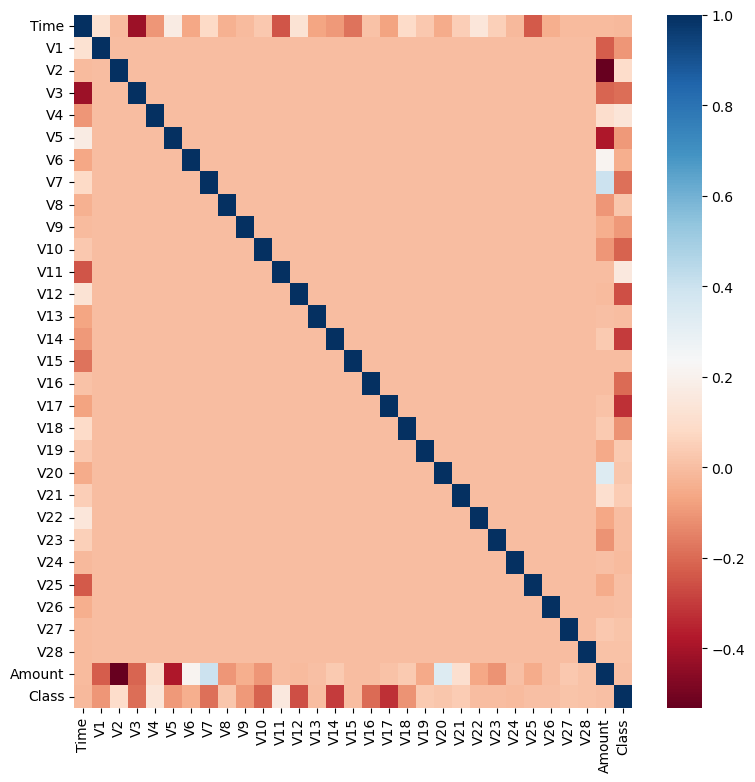

In [37]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

#### Several features have a high high negative correlation
#### get_outler method

In [39]:
import numpy as np
def get_outlier(df=None, column=None, weight=1.5):
    # Pull out Fraud Case & Calculate percentaile of Q1 & Q3
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # Multiplying 1.5 to calculated IQR, and add or substract to Q1 & Q1
    iqr = quantile_75 - quantile_25
    iqr_weight= iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # Defining Outlier VALUES
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [40]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('Outliers:', outlier_index)

Outliers: Index([8296, 8615, 9035, 9252], dtype='int64')


In [41]:
card_df.shape

(284807, 31)

#### We have removed the outliers (4 of them in this case)
#### Retraining model and Log Scaling

In [43]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    # Addition of pre def logics that removed the outliers
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print(' ### Logistic Regression Performance ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test= X_test, tgt_train = y_train, tgt_test = y_test)
print(' ### LightGBM Performance ### ')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train= y_train, tgt_test=y_test)

 ### Logistic Regression Performance ###
Covariance Matrix
[[85280    15]
 [   48    98]]
 Accuracy: 0.9993, Precision: 0.8673, Recall: 0.6712,    F1: 0.7568, AUC: 0.9725
 ### LightGBM Performance ### 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

#### Logistic Regression Performance:
##### Covariance Matrix
##### [[85280    15]
#####  [   48    98]]
#####  Accuracy: 0.9993, Precision: 0.8673, Recall: 0.6712,    F1: 0.7568, AUC: 0.9725
#### LightGBM Performance:
##### Covariance Matrix
##### [[85290     5]
#####  [   25   121]]
#####  Accuracy: 0.9996, Precision: 0.9603, Recall: 0.8288,    F1: 0.8897, AUC: 0.9780

#### Comparing to previous draft models:
#### LR: Recall improved from 60.81% to 67.12%
#### LGBM: Recall increased from 76.35% to 82.88%

### But wait! Imbalance issue has not been solved yet.
## Finally using SMOTE to fix imbalance! WOOOOOO!

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('Before SMOTE: ', X_train.shape, y_train.shape)
print('After SMOTE: ', X_train_over.shape, y_train_over.shape)
print('Label Variance After Smote: \n', pd.Series(y_train_over).value_counts())

Before SMOTE:  (199362, 29) (199362,)
After SMOTE:  (398040, 29) (398040,)
Label Variance After Smote: 
 Class
0    199020
1    199020
Name: count, dtype: int64


### NOte: Be mindful to not increase the testing labels

In [49]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

Covariance Matrix
[[82933  2362]
 [   11   135]]
 Accuracy: 0.9722, Precision: 0.0541, Recall: 0.9247,    F1: 0.1022, AUC: 0.9736


#### The results for LogisticRegression after using SMOTE
#### Recall improved but precision is only 5.4%, very poor
#### Reason: Oversampling fraud case increased the case of predicting postiive cases
#### Precision is TP/ (TP+FP)
#### Reviewing what is happening

In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

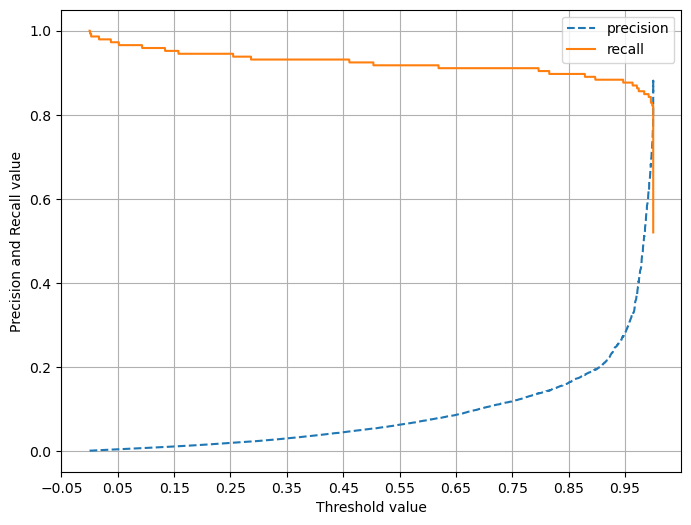

In [52]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:,1] )

### Review of the graph:
#### The precision suddenly decreases after threshold 0.99. LogisticRegression is not suitable for SMOTE in this case
### Reviewing SMOTE in LGBM

In [54]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                     tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

#### Results of LGBM with SMOTE
##### Covariance Matrix
##### [[85283    12]
#####  [   22   124]]
#####  Accuracy: 0.9996, Precision: 0.9118, Recall: 0.8493,    F1: 0.8794, AUC: 0.9814

### ONCE AGAIN, precision decreased but recall increased from 82.88% to 84.93%
#### Normally SMOTE works like this due to oversampling
#### Specific SMOTE packages would help mitigate these gap variances.

## End of review
### Which model performed best, and why?
### Homework:
## Answer:
### The models:
##### LightGBM is an ensemble model, it implements GRADIENT BOOSTING DECISION TREES. It belongs to the family of boosting ensemble methods, where multiple weak learners (usually decision trees) combine and form a storn model.
##### LogisticRegressionModel  is not an ensemble model, fits a single linear equation to the data, does nto combine multiple models or learners. Finds a decision line that separates classes using a single linear function.
### Precision Recall Curve Plots:
##### After analyzing both graphs with the help papa, LR graph appears to be better because it maintains higher precision (near 1) without sacrificing too much recall, in the other hand LGBM graph shows a bigger drop at higher thresholds, it can miss more positive cases as the threshold increases.
##### After SMOTE, ON BOTH MODELS the precision drops becayse of the oversampling of the froud case ( which is very rare, making it miss the actual True positives due to the addition of new samples when oversampling)
##### SMOTE does improve both models,  the only downside is the precision.
### Final data & Conclusion
###### Results of LGBM with SMOTE###### 
Covariance Matrix###### 
[[85283 12###### ]
[ 22 124###### ]]
Accuracy: 0.9996, Precision: 0.9118, Recall: 0.8493, F1: 0.8794, AUC: 0.

###### LinearRegression model with SMOTE
###### Covariance Matrix###### 
[[82933  2362]###### 
 [   11   135]###### ]
 Accuracy: 0.9722, Precision: 0.0541, Recall: 0.92    F1: 0.1022, AUC: 0.9

## Final Answer
#### Based on the data, LBGM has a higher accuracy than LR, also a higher precision, F1, & AUC scores. Although the precision recall graphs may make it look like LR is better; I believe LGBM is the best model because of the ensembling properties, making the model more accurate and with better results than LR.7369814

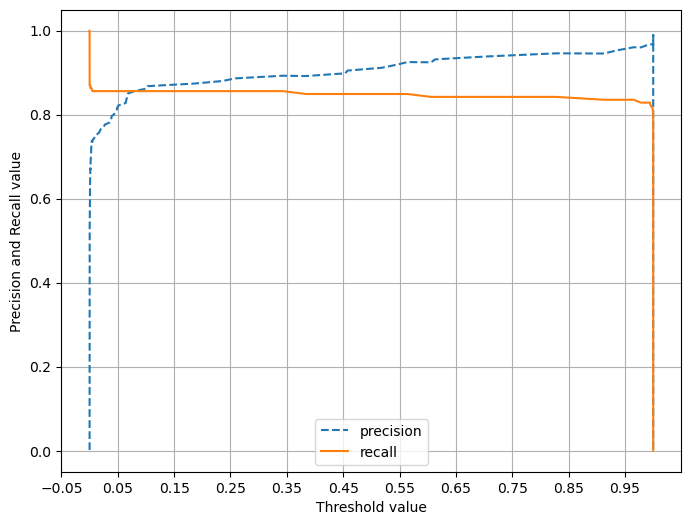

In [89]:
precision_recall_curve_plot( y_test, lgbm_clf.predict_proba(X_test)[:,1] )